In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsCNN1S = pd.read_excel('grilla_CNN_NARMAX_1STEPS.xlsx', header=0)
summaryModelsCNN2S = pd.read_excel('grilla_CNN_NARMAX_2STEPS.xlsx', header=0)
summaryModelsCNN3S = pd.read_excel('grilla_CNN_NARMAX_3STEPS.xlsx', header=0)

grilla_CNN_NARMAX_AQP = pd.concat([summaryModelsCNN1S, summaryModelsCNN2S], ignore_index=True)
grilla_CNN_NARMAX_AQP = pd.concat([grilla_CNN_NARMAX_AQP, summaryModelsCNN3S], ignore_index=True)

grilla_CNN_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    2304 non-null   float64
 1   delayedSteps            2304 non-null   int64  
 2   nameModel               2304 non-null   object 
 3   nameHistory             2304 non-null   object 
 4   nameConfiguration       2304 non-null   object 
 5   timeTrain (in seconds)  2304 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 108.1+ KB


##La cantidad de modelos generados para el CNN NARX de DDFO fue de 2304

In [4]:
rslt_df = grilla_CNN_NARMAX_AQP.sort_values('MAPE')
total = grilla_CNN_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_CNN_NARMAX_AQP.describe()

Tiempo total: 202313.14


MAPE  delayedSteps  timeTrain (in seconds)
count  2304.000000   2304.000000             2304.000000
mean     70.979610      2.000000               87.809523
std      34.564184      0.816674                5.938596
min      10.607618      1.000000               38.540000
25%      31.178516      1.000000               83.267500
50%      99.612300      2.000000               88.800000
75%      99.621879      3.000000               91.240000
max     100.000000      3.000000              141.500000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 32538, lo que equivale a 56 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
881   10.607618  ...                   87.15
785   10.791209  ...                   86.99
977   12.986641  ...                   87.46
1073  13.017624  ...                   87.52
241   13.776728  ...                   79.50
1653  15.350729  ...                   90.84
1557  15.874972  ...                   90.47
981   16.121040  ...                   87.65
1553  16.198977  ...                   90.03
1777  16.345360  ...                   90.56
1077  16.470727  ...                   86.99
101   16.859889  ...                   79.71
289   16.970033  ...                   78.49
121   17.140353  ...                   80.03
193   17.401032  ...                   78.18
105   17.410458  ...                   80.94
1265  17.448750  ...                   94.60
816   17.487899  ...                   88.24
481   17.506332  ...                   80.77
824   17.561823  ...                   87.60
689   17.627771  ...                   82.96
673   17.791783  ...                   80.99
197   17.948671  ...                   78.22
2264  18.084289  ...                   95.54
1629  18.134431  ...                   89.84
797   18.178437  ...                   87.76
2164  18.279413  ...                   94.72
21    18.292617  ...                   79.54
209   18.321756  ...                   78.73
593   18.349141  ...                   82.27
1081  18.518884  ...                   86.86
1012  18.571827  ...                   88.43
389   18.612403  ...                   81.76
1969  18.616072  ...                   89.68
1213  18.643676  ...                   89.52
1117  18.652908  ...                   90.02
1269  18.708476  ...                   88.70
916   18.778230  ...                   87.22
213   18.799407  ...                   78.97
1205  18.809037  ...                   89.71
1204  19.042116  ...                   88.49
1393  19.091118  ...                   89.83
1745  19.168310  ...                   90.53
1     19.203997  ...                   39.91
33    19.209061  ...                   81.50

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                10.6076
delayedSteps                                                              2
nameModel                 results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
nameHistory               results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
nameConfiguration         results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
timeTrain (in seconds)                                                87.15
Name: 881, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                10.6076
delayedSteps                                                              2
nameModel                 results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
nameHistory               results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
nameConfiguration         results/CNN_214_1_32_5_sigmoid_causal_32_relu_...
timeTrain (in seconds)                                                87.15
Name: 881, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S_history.npy
results/CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S_config.npy
results/CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S.h5


In [10]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S_history.npy
CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S_config.npy
CNN_214_1_32_5_sigmoid_causal_32_relu_mean_absolute_error_2S.h5


In [11]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [308.79913330078125, 308.68157958984375, 308.54071044921875, 308.39825439453125, 308.2549743652344, 308.11090087890625, 307.97003173828125, 307.8288879394531, 307.688720703125, 307.54638671875, 307.4009704589844, 307.25347900390625, 307.1018981933594, 306.9481201171875, 306.7894592285156, 306.6297302246094, 306.46490478515625, 306.2972717285156, 306.1272888183594, 305.95452880859375, 305.7798767089844, 305.6019592285156, 305.4185791015625, 305.23291015625, 305.04119873046875, 304.843017578125, 304.64031982421875, 304.43328857421875, 304.2181701660156, 303.99981689453125, 303.77392578125, 303.54400634765625, 303.30865478515625, 303.0669250488281, 302.8208923339844, 302.56793212890625, 302.3088073730469, 302.0406799316406, 301.76776123046875, 301.4881896972656, 301.1998596191406, 300.90374755859375, 300.60107421875, 300.2911682128906, 299.970703125, 299.64508056640625, 299.310302734375, 298.96563720703125, 298.61395263671875, 298.2530212402344, 297.8844299316406, 297.50503540039

In [12]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledCNN.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledCNN.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxCNN.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxCNN.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


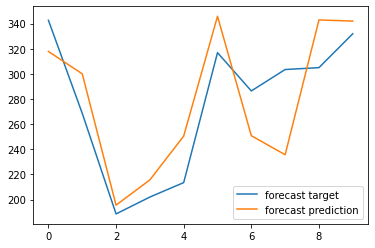

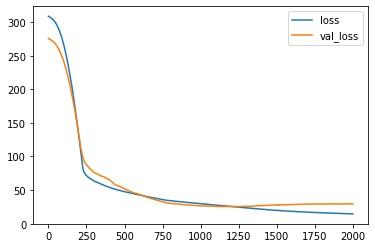

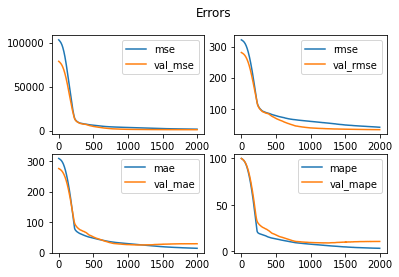

In [14]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)